In [1]:
%%capture
# IMPORTS
import PGC
from scipy import signal
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
import seaborn as sns
import math
import matplotlib
from multiprocessing import Pool
import itertools
from functools import partial
import copy

In [2]:
# HELVETICA
#plt.rc('font', family='Helvetica')

In [3]:
# FONT SIZE FOR FIGURES
matplotlib.rcParams.update({'font.size': 14})

In [4]:
# PARAMETERS

# Time parameters
time_step = 1/32
time_max = (1-time_step)

# Number of trials
num_trials = int(1e4)

# Frequency for X(t) time process
f0 = 2;

# Max frequency for analysis
f_max = 6;

# Number of bootstrap iterations to use for training classifier
num_boot_iter = 100;

# Scale for Rayleigh RVs for X
# Standard deviation for Gaussian RVs in W and Z
X_scale = 1
W_scale = 0.75
Z_scale = 0.75

In [5]:
# GENERATE TIME (include time_max in time by adding one additional time_step)
time = np.arange(0,time_max+time_step,time_step)
time_array = np.matlib.repmat(time[:, None].T,num_trials,1)

In [6]:
# GENERATE THREE PROCESSES
# First generate random amplitude(s)
X_amp = np.matlib.repmat(np.random.rayleigh(X_scale,(num_trials,1)),1,len(time))
W_amp = np.matlib.repmat(np.random.rayleigh(W_scale,(num_trials,1)),1,len(time))
Z_amp = np.matlib.repmat(np.random.rayleigh(Z_scale,(num_trials,1)),1,len(time))

# Next generate random phase(s)
X_phase = np.matlib.repmat(2*math.pi*np.random.uniform(size=(num_trials,1)),1,len(time))
W_phase = np.matlib.repmat(2*math.pi*np.random.uniform(size=(num_trials,1)),1,len(time))
Z_phase = np.matlib.repmat(2*math.pi*np.random.uniform(size=(num_trials,1)),1,len(time))

# Now generate random processes
X = X_amp*np.cos((2*math.pi*f0*time_array)+X_phase)
#W = X**2 + np.random.normal(scale=W_scale,size=(X.shape))
W = X**2 + (W_amp*np.cos((2*math.pi*f0*time_array)+W_phase))**2
#Z = X**3 + np.random.normal(scale=Z_scale,size=(X.shape))
Z = X**3 + (Z_amp*np.cos((2*math.pi*f0*time_array)+Z_phase))**3
#Z = (Z_amp*np.cos((2*math.pi*f0*time_array)+Z_phase))**3

# Add very very light noise
X = X + (0.001)*np.random.normal(size=(X_phase.shape))
W = W + (0.001)*np.random.normal(size=(X_phase.shape))
Z = Z + (0.001)*np.random.normal(size=(X_phase.shape))

In [7]:
# COMBINE DATA, DETERMINE FREQUENCIES
data = np.stack((X,W,Z),axis=0)
f = np.fft.fftfreq(len(time),time_step)

In [8]:
print(f)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15. -16. -15. -14. -13. -12. -11. -10.  -9.  -8.  -7.  -6.  -5.
  -4.  -3.  -2.  -1.]


In [9]:
# SELECT FREQUENCIES OF INTEREST
f_indices_of_interest = np.arange(len(f))
f_indices_of_interest = np.delete(f_indices_of_interest,np.where(f<0))
f_indices_of_interest = np.delete(f_indices_of_interest,np.where(f>f_max))
print(f_indices_of_interest)
print(f[f_indices_of_interest])
print(f)

[0 1 2 3 4 5 6]
[0. 1. 2. 3. 4. 5. 6.]
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15. -16. -15. -14. -13. -12. -11. -10.  -9.  -8.  -7.  -6.  -5.
  -4.  -3.  -2.  -1.]


In [10]:
# CREATE ITERATION LIST OF FREQUENCIES
iter_list = list(itertools.product(f_indices_of_interest.tolist(),
                                   f_indices_of_interest.tolist()))
print(iter_list)

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6)]


In [11]:
#iter_list = [iter_list[i] for i in [2,4,6,14,16,18,20,28,30,34,42,44,46]]
#print(iter_list)

In [12]:
# DEFINE MIF FUNCTION FOR PARALLEL
def MIF_parallel(data,num_boot_iter,f_indices_pair):
    f_i = f_indices_pair[0]
    f_j = f_indices_pair[1]
    return PGC.pgc(data,num_boot_iter,f_i,f_j)

In [13]:
# ESTIMATE MIF
pool = Pool()
func = partial(MIF_parallel,data,num_boot_iter)
MIF_list = pool.map(func,iter_list)

Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhanTester = Classifier, metric = donsker_varadhan

Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhanTester = Classifier, metric = donsker_varadhan

Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Clas

In [14]:
# UNWRAP
MIF = np.zeros((3,3,len(f_indices_of_interest),len(f_indices_of_interest)))
for ii in range(len(MIF_list)):
    MIF[:,:,iter_list[ii][0],iter_list[ii][1]] = MIF_list[ii]
MIF[MIF<0] = 0

In [15]:
# CONDITIONING THRESHOLD
threshold = 0.02

In [16]:
# CUSTOM BOOTSTRAP
#num_boot_iter = 50

In [17]:
# Control PGC
PGC_ctl = copy.deepcopy(MIF)
for ii in range(MIF.shape[0]):
    for jj in range(ii+1,MIF.shape[1]):     
        kk = 3-ii-jj
        f_to_cond = np.where(np.squeeze(MIF[ii,jj,:,:])>threshold)
        for ff in range(len(f_to_cond[0])):
            f_to_cond_ii = f_to_cond[0][ff]
            f_to_cond_jj = f_to_cond[1][ff]
            
            f_ii_and_kk = np.where(np.squeeze(MIF[ii,kk,f_to_cond_ii,:])>threshold)[0]
            f_jj_and_kk = np.where(np.squeeze(MIF[jj,kk,f_to_cond_jj,:])>threshold)[0]
            
            f_to_cond_all = list(set(f_ii_and_kk.tolist()+f_jj_and_kk.tolist()))
            
            if len(f_to_cond_all)>0:
                if len(f_to_cond_all)==2:
                    f_to_cond_all = [1,3]
                elif len(f_to_cond_all)==1:
                    f_to_cond_all = [1]
                else:
                    raise Exception("Need more control frequencies")
                print((ii,jj,f_to_cond_all))
                PGC_ctl[ii,jj,f_to_cond_ii,f_to_cond_jj] = PGC.pgc(data,num_boot_iter,f_to_cond_ii,f_to_cond_jj,f_to_cond_all,ii,jj)
PGC_ctl[PGC_ctl<0]=0

(0, 1, [1, 3])
Tester = Classifier, metric = donsker_varadhan
(0, 1, [1, 3])
Tester = Classifier, metric = donsker_varadhan
(0, 2, [1, 3])
Tester = Classifier, metric = donsker_varadhan
(0, 2, [1, 3])
Tester = Classifier, metric = donsker_varadhan
(1, 2, [1])
Tester = Classifier, metric = donsker_varadhan
(1, 2, [1])
Tester = Classifier, metric = donsker_varadhan
(1, 2, [1])
Tester = Classifier, metric = donsker_varadhan
(1, 2, [1])
Tester = Classifier, metric = donsker_varadhan


In [18]:
# PGC
PGC = copy.deepcopy(MIF)
for ii in range(MIF.shape[0]):
    for jj in range(ii+1,MIF.shape[1]):     
        kk = 3-ii-jj
        f_to_cond = np.where(np.squeeze(MIF[ii,jj,:,:])>threshold)
        for ff in range(len(f_to_cond[0])):
            f_to_cond_ii = f_to_cond[0][ff]
            f_to_cond_jj = f_to_cond[1][ff]
            
            f_ii_and_kk = np.where(np.squeeze(MIF[ii,kk,f_to_cond_ii,:])>threshold)[0]
            f_jj_and_kk = np.where(np.squeeze(MIF[jj,kk,f_to_cond_jj,:])>threshold)[0]
            
            f_to_cond_all = list(set(f_ii_and_kk.tolist()+f_jj_and_kk.tolist()))
            
            if len(f_to_cond_all)>0:
                PGC[ii,jj,f_to_cond_ii,f_to_cond_jj] = PGC.pgc(data,num_boot_iter,f_to_cond_ii,f_to_cond_jj,f_to_cond_all,ii,jj)
PGC[PGC<0]=0

Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan


In [19]:
# PLOTTING PARAMETERS
lw=1

/home/joe/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


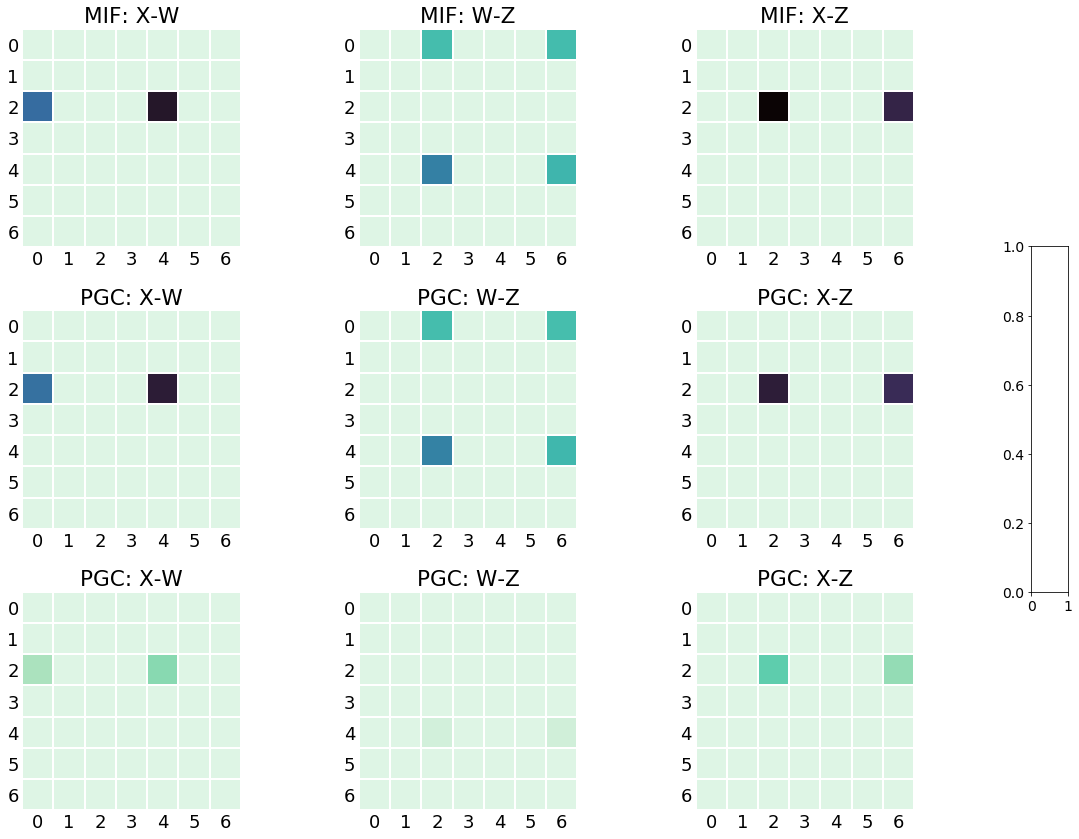

In [20]:
# PLOT RESULTS
f_plt, ax = plt.subplots(3,3,figsize=(17, 12),sharex=True, sharey=True);
#f_plt.tight_layout()
cbar_ax = f_plt.add_axes([.91, .3, .03, .4])

matplotlib.rcParams.update({'font.size': 18})
cmap_name = "mako_r"
cbar_flag = False

# MIF: X-W
ax = plt.subplot(331)
sns.heatmap(np.squeeze(MIF[0,1,:,:]),
            square=True,cmap=cmap_name,
            vmin=0, vmax=np.max(np.stack((MIF,PGC,PGC_ctl))),
            linewidths=lw,cbar=cbar_flag)
plt.title('MIF: X-W')
plt.xticks(np.arange(len(f_indices_of_interest))+0.5)
plt.yticks(np.arange(len(f_indices_of_interest))+0.5,rotation=0)
ax.tick_params(axis=u'both', which=u'both',length=0)


# MIF: W-Z
ax = plt.subplot(332)
sns.heatmap(np.squeeze(MIF[1,2,:,:]),
            square=True,cmap=cmap_name,
            vmin=0, vmax=np.max(np.stack((MIF,PGC,PGC_ctl))),
            linewidths=lw,cbar=cbar_flag)
plt.title('MIF: W-Z')
plt.xticks(np.arange(len(f_indices_of_interest))+0.5)
plt.yticks(np.arange(len(f_indices_of_interest))+0.5,rotation=0)
ax.tick_params(axis=u'both', which=u'both',length=0)


# MIF: X-Z
ax = plt.subplot(333)
sns.heatmap(np.squeeze(MIF[0,2,:,:]),
            square=True,cmap=cmap_name,
            vmin=0, vmax=np.max(np.stack((MIF,PGC,PGC_ctl))),
            linewidths=lw,cbar=cbar_flag)
plt.title('MIF: X-Z')
plt.xticks(np.arange(len(f_indices_of_interest))+0.5)
plt.yticks(np.arange(len(f_indices_of_interest))+0.5,rotation=0)
ax.tick_params(axis=u'both', which=u'both',length=0)


# PGC
ax = plt.subplot(334)
sns.heatmap(np.squeeze(PGC_ctl[0,1,:,:]),
            square=True,cmap=cmap_name,
            vmin=0, vmax=np.max(np.stack((MIF,PGC,PGC_ctl))),
            linewidths=lw,cbar=cbar_flag)
plt.title('PGC: X-W')
plt.xticks(np.arange(len(f_indices_of_interest))+0.5)
plt.yticks(np.arange(len(f_indices_of_interest))+0.5,rotation=0)
ax.tick_params(axis=u'both', which=u'both',length=0)


# PGC
ax = plt.subplot(335)
sns.heatmap(np.squeeze(PGC_ctl[1,2,:,:]),
            square=True,cmap=cmap_name,
            vmin=0, vmax=np.max(np.stack((MIF,PGC,PGC_ctl))),
            linewidths=lw,cbar=cbar_flag)
plt.title('PGC: W-Z')
plt.xticks(np.arange(len(f_indices_of_interest))+0.5)
plt.yticks(np.arange(len(f_indices_of_interest))+0.5,rotation=0)
ax.tick_params(axis=u'both', which=u'both',length=0)


# PGC
ax = plt.subplot(336)
sns.heatmap(np.squeeze(PGC_ctl[0,2,:,:]),
            square=True,cmap=cmap_name,
            vmin=0, vmax=np.max(np.stack((MIF,PGC,PGC_ctl))),
            linewidths=lw,cbar=cbar_flag)
plt.title('PGC: X-Z')
plt.xticks(np.arange(len(f_indices_of_interest))+0.5)
plt.yticks(np.arange(len(f_indices_of_interest))+0.5,rotation=0)
ax.tick_params(axis=u'both', which=u'both',length=0)


# PGC
ax = plt.subplot(337)
sns.heatmap(np.squeeze(PGC[0,1,:,:]),
            square=True,cmap=cmap_name,
            vmin=0, vmax=np.max(np.stack((MIF,PGC,PGC_ctl))),
            linewidths=lw,cbar=cbar_flag)
plt.title('PGC: X-W')
plt.xticks(np.arange(len(f_indices_of_interest))+0.5)
plt.yticks(np.arange(len(f_indices_of_interest))+0.5,rotation=0)
ax.tick_params(axis=u'both', which=u'both',length=0)


# PGC
ax = plt.subplot(338)
sns.heatmap(np.squeeze(PGC[1,2,:,:]),
            square=True,cmap=cmap_name,
            vmin=0, vmax=np.max(np.stack((MIF,PGC,PGC_ctl))),
            linewidths=lw,cbar=cbar_flag)
plt.title('PGC: W-Z')
plt.xticks(np.arange(len(f_indices_of_interest))+0.5)
plt.yticks(np.arange(len(f_indices_of_interest))+0.5,rotation=0)
ax.tick_params(axis=u'both', which=u'both',length=0)


# PGC
ax = plt.subplot(339)
sns.heatmap(np.squeeze(PGC[0,2,:,:]),
            square=True,cmap=cmap_name,
            vmin=0, vmax=np.max(np.stack((MIF,PGC,PGC_ctl))),
            linewidths=lw,cbar=cbar_flag)
plt.title('PGC: X-Z')
plt.xticks(np.arange(len(f_indices_of_interest))+0.5)
plt.yticks(np.arange(len(f_indices_of_interest))+0.5,rotation=0)
ax.tick_params(axis=u'both', which=u'both',length=0)


f_plt.tight_layout(rect=[0, 0, .9, 1])

plt.savefig('figure4.pdf');

/home/joe/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


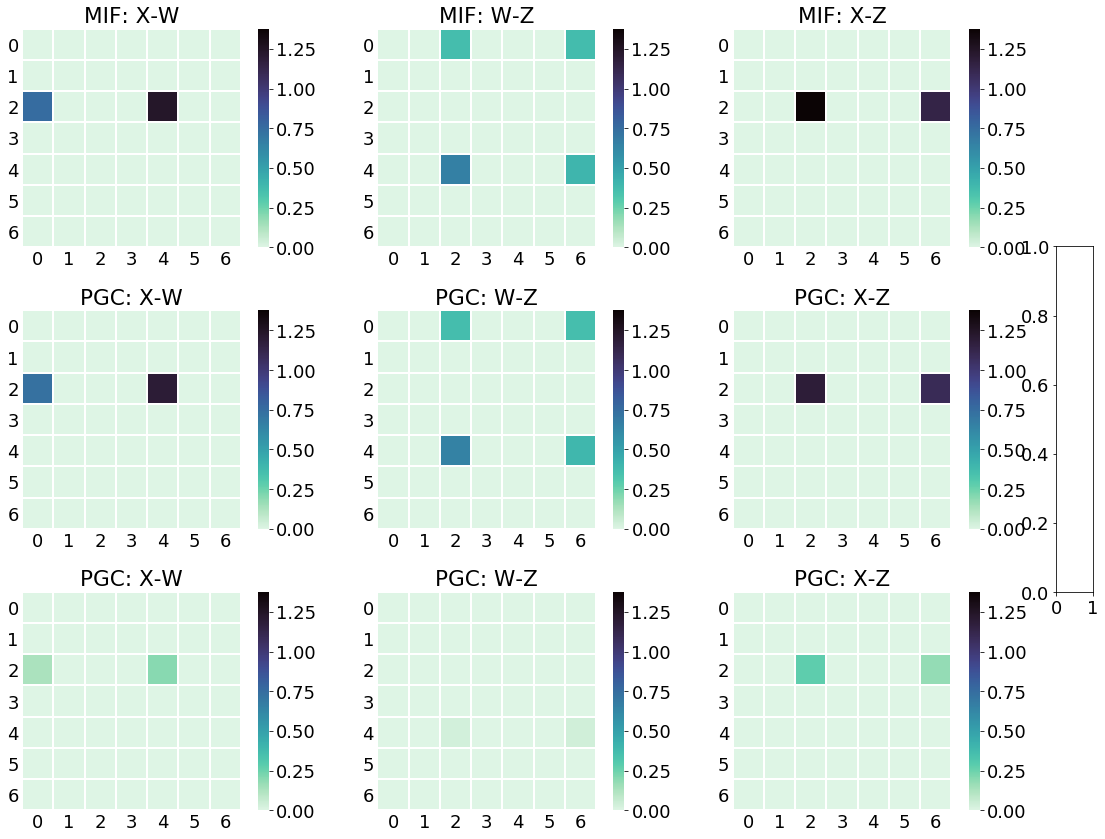

In [21]:
# PLOT RESULTS
f_plt, ax = plt.subplots(3,3,figsize=(17, 12),sharex=True, sharey=True);
#f_plt.tight_layout()
cbar_ax = f_plt.add_axes([.91, .3, .03, .4])

matplotlib.rcParams.update({'font.size': 18})
cmap_name = "mako_r"
cbar_flag = True

# MIF: X-W
ax = plt.subplot(331)
sns.heatmap(np.squeeze(MIF[0,1,:,:]),
            square=True,cmap=cmap_name,
            vmin=0, vmax=np.max(np.stack((MIF,PGC,PGC_ctl))),
            linewidths=lw,cbar=cbar_flag)
plt.title('MIF: X-W')
plt.xticks(np.arange(len(f_indices_of_interest))+0.5)
plt.yticks(np.arange(len(f_indices_of_interest))+0.5,rotation=0)
ax.tick_params(axis=u'both', which=u'both',length=0)


# MIF: W-Z
ax = plt.subplot(332)
sns.heatmap(np.squeeze(MIF[1,2,:,:]),
            square=True,cmap=cmap_name,
            vmin=0, vmax=np.max(np.stack((MIF,PGC,PGC_ctl))),
            linewidths=lw,cbar=cbar_flag)
plt.title('MIF: W-Z')
plt.xticks(np.arange(len(f_indices_of_interest))+0.5)
plt.yticks(np.arange(len(f_indices_of_interest))+0.5,rotation=0)
ax.tick_params(axis=u'both', which=u'both',length=0)


# MIF: X-Z
ax = plt.subplot(333)
sns.heatmap(np.squeeze(MIF[0,2,:,:]),
            square=True,cmap=cmap_name,
            vmin=0, vmax=np.max(np.stack((MIF,PGC,PGC_ctl))),
            linewidths=lw,cbar=cbar_flag)
plt.title('MIF: X-Z')
plt.xticks(np.arange(len(f_indices_of_interest))+0.5)
plt.yticks(np.arange(len(f_indices_of_interest))+0.5,rotation=0)
ax.tick_params(axis=u'both', which=u'both',length=0)


# PGC
ax = plt.subplot(334)
sns.heatmap(np.squeeze(PGC_ctl[0,1,:,:]),
            square=True,cmap=cmap_name,
            vmin=0, vmax=np.max(np.stack((MIF,PGC,PGC_ctl))),
            linewidths=lw,cbar=cbar_flag)
plt.title('PGC: X-W')
plt.xticks(np.arange(len(f_indices_of_interest))+0.5)
plt.yticks(np.arange(len(f_indices_of_interest))+0.5,rotation=0)
ax.tick_params(axis=u'both', which=u'both',length=0)


# PGC
ax = plt.subplot(335)
sns.heatmap(np.squeeze(PGC_ctl[1,2,:,:]),
            square=True,cmap=cmap_name,
            vmin=0, vmax=np.max(np.stack((MIF,PGC,PGC_ctl))),
            linewidths=lw,cbar=cbar_flag)
plt.title('PGC: W-Z')
plt.xticks(np.arange(len(f_indices_of_interest))+0.5)
plt.yticks(np.arange(len(f_indices_of_interest))+0.5,rotation=0)
ax.tick_params(axis=u'both', which=u'both',length=0)


# PGC
ax = plt.subplot(336)
sns.heatmap(np.squeeze(PGC_ctl[0,2,:,:]),
            square=True,cmap=cmap_name,
            vmin=0, vmax=np.max(np.stack((MIF,PGC,PGC_ctl))),
            linewidths=lw,cbar=cbar_flag)
plt.title('PGC: X-Z')
plt.xticks(np.arange(len(f_indices_of_interest))+0.5)
plt.yticks(np.arange(len(f_indices_of_interest))+0.5,rotation=0)
ax.tick_params(axis=u'both', which=u'both',length=0)


# PGC
ax = plt.subplot(337)
sns.heatmap(np.squeeze(PGC[0,1,:,:]),
            square=True,cmap=cmap_name,
            vmin=0, vmax=np.max(np.stack((MIF,PGC,PGC_ctl))),
            linewidths=lw,cbar=cbar_flag)
plt.title('PGC: X-W')
plt.xticks(np.arange(len(f_indices_of_interest))+0.5)
plt.yticks(np.arange(len(f_indices_of_interest))+0.5,rotation=0)
ax.tick_params(axis=u'both', which=u'both',length=0)


# PGC
ax = plt.subplot(338)
sns.heatmap(np.squeeze(PGC[1,2,:,:]),
            square=True,cmap=cmap_name,
            vmin=0, vmax=np.max(np.stack((MIF,PGC,PGC_ctl))),
            linewidths=lw,cbar=cbar_flag)
plt.title('PGC: W-Z')
plt.xticks(np.arange(len(f_indices_of_interest))+0.5)
plt.yticks(np.arange(len(f_indices_of_interest))+0.5,rotation=0)
ax.tick_params(axis=u'both', which=u'both',length=0)


# PGC
ax = plt.subplot(339)
sns.heatmap(np.squeeze(PGC[0,2,:,:]),
            square=True,cmap=cmap_name,
            vmin=0, vmax=np.max(np.stack((MIF,PGC,PGC_ctl))),
            linewidths=lw,cbar=cbar_flag)
plt.title('PGC: X-Z')
plt.xticks(np.arange(len(f_indices_of_interest))+0.5)
plt.yticks(np.arange(len(f_indices_of_interest))+0.5,rotation=0)
ax.tick_params(axis=u'both', which=u'both',length=0)


f_plt.tight_layout(rect=[0, 0, .9, 1])

plt.savefig('colorbar.pdf');